# IntelliJ IDEA Analysis

### Case study

#### IntelliJ IDEA

* IDE for Java developers
* Written almost entirely in Java
* Large and long active project

### I. Stating Question (1/3)

* Write down the question explicitly
* Explain the anaysis idea in an understandable way


### I. Stating Question (2/3)

<b>Question</b>
* Which source code files are particularly complex and changed frequently recently?


### I. Stating Question (3/3)
#### Implementation ideas
* Tools: jupyter, python, pandas, matplotlib
* Heuristics:
 * "complex": many lines of source code.
 * "changes ... frequently": high number of commits
 * "recently": last 90 days


**Meta Objective:** Learn basic mechanics.

### II. Exploratory Data Analysis
* Find and load possible software data
* Clean and filter the raw data

*We load a data export from a Git repository.*

In [1]:
import pandas as pd
log = pd.read_csv("dataset/git_log_intellij.csv.gz")
log.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*We look at basic info about the dataset.*

In [2]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128819 entries, 0 to 1128818
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   additions  1128819 non-null  object
 1   deletions  1128819 non-null  object
 2   filename   1128819 non-null  object
 3   sha        1128819 non-null  object
 4   timestamp  1128819 non-null  object
 5   author     1128819 non-null  object
dtypes: object(6)
memory usage: 51.7+ MB


<b>1</b> **DataFrame** (~ programmable Excel worksheet), <b>6</b> **Series** (= columns), <b>1128819</b> **entries** (= rows)

*We convert the timestamps of texts into objects.*

In [3]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*We're just looking at recent changes.*

In [4]:
# use log['timestamp'].max() instead of pd.Timedelta('today') to avoid outdated data in the future
recent = log[log['timestamp'] > log['timestamp'].max() - pd.Timedelta('90 days')]
recent.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*We want to use only Java code.*

In [5]:
java = recent[recent['filename'].str.endswith(".java")].copy()
java.head() 

,additions,deletions,filename,sha,timestamp,author
27,1,10,platform/smRunner/src/com/intellij/execution/t...,f4ed78c8f574,2019-06-28 18:28:41,Ilya.Kazakevich
29,28,0,platform/smRunner/testSrc/com/intellij/executi...,f4ed78c8f574,2019-06-28 18:28:41,Ilya.Kazakevich
30,6,3,plugins/InspectionGadgets/InspectionGadgetsAna...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko
31,2,2,plugins/InspectionGadgets/test/com/siyeh/igfix...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko
32,2,2,plugins/InspectionGadgets/test/com/siyeh/igfix...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko


### III. Formal Modeling

* Create new views
* Blend in more data

*Wir zählen die Anzahl der Änderungen je Datei.*

In [6]:
changes = java.groupby('filename')[['sha']].count()
changes.head()

,sha
filename,
RegExpSupport/gen/org/intellij/lang/regexp/_RegExLexer.java,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpCapability.java,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpFileType.java,5
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,16
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,15


*We add info about the code lines...*

In [7]:
loc = pd.read_csv("dataset/cloc_intellij.csv.gz", index_col=1)
loc.head()

,language,blank,comment,code
filename,,,,
java/java-tests/testData/psi/resolve/ThinletBig.java,Java,299,1140,20125
java/java-tests/testData/psi/parser-full/declarationParsing/class/LongClass.java,Java,10121,10164,10166
python/gen/com/jetbrains/python/console/protocol/PythonConsoleBackendService.java,Java,1971,591,10086
jps/jps-builders/src/org/jetbrains/jps/api/CmdlineRemoteProto.java,Java,502,3066,8605
plugins/java-decompiler/engine/testData/obfuscated/aj.java,Java,551,1,8043


*...and blend them with the existing data.*

In [8]:
hotspots = changes.join(loc[['code']]).dropna(subset=['code'])
hotspots.head()

,sha,code
filename,,
RegExpSupport/gen/org/intellij/lang/regexp/_RegExLexer.java,1,1190.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpCapability.java,1,34.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpFileType.java,5,40.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,16,92.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,15,168.0


### VI. Interpretation
* Elaborate the core result of the analysis.
* Make the central message / new findings clear

*We only show the TOP 10 hotspots in the code.*

In [9]:
top10 = hotspots.sort_values(by="sha", ascending=False).head(10)
top10

,sha,code
filename,,
platform/structuralsearch/source/com/intellij/structuralsearch/plugin/ui/StructuralSearchDialog.java,83,1097.0
platform/platform-impl/src/com/intellij/idea/IdeaApplication.java,71,366.0
platform/core-impl/src/com/intellij/ide/plugins/PluginManagerCore.java,67,1425.0
platform/platform-impl/src/com/intellij/openapi/project/impl/ProjectManagerImpl.java,65,810.0
platform/lang-impl/src/com/intellij/build/BuildTreeConsoleView.java,63,936.0
java/java-analysis-impl/src/com/intellij/codeInspection/dataFlow/TrackingRunner.java,63,1300.0
platform/platform-impl/src/com/intellij/idea/StartupUtil.java,62,551.0
platform/platform-impl/src/com/intellij/ide/plugins/PluginManagerConfigurableNewLayout.java,60,1284.0
platform/platform-impl/src/com/intellij/ide/ui/laf/darcula/ui/DarculaComboBoxUI.java,59,606.0


### V. Communication
* Transform the findings into an understandable visualization
* Communicate the next steps after analysis

*We generate an XY chart from the TOP 10 list.*

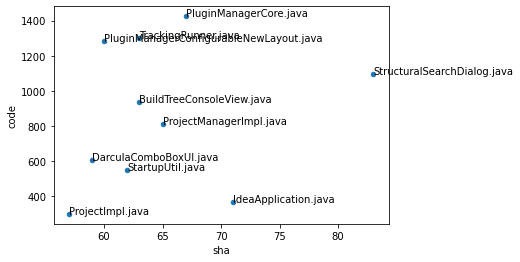

In [10]:
ax = top10.plot.scatter('sha', 'code');

for k, v in top10.iterrows():
    ax.annotate(k.split("/")[-1], v)

<b>Result:</b> There are a few complex files that change very frequently. Next step is to investigate those files in more detail.

### Bonus
Which files change particularly frequently in general?

In [11]:
most_changes = hotspots['sha'].sort_values(ascending=False)
most_changes.head(10)

filename
platform/structuralsearch/source/com/intellij/structuralsearch/plugin/ui/StructuralSearchDialog.java    83
platform/platform-impl/src/com/intellij/idea/IdeaApplication.java                                       71
platform/core-impl/src/com/intellij/ide/plugins/PluginManagerCore.java                                  67
platform/platform-impl/src/com/intellij/openapi/project/impl/ProjectManagerImpl.java                    65
platform/lang-impl/src/com/intellij/build/BuildTreeConsoleView.java                                     63
java/java-analysis-impl/src/com/intellij/codeInspection/dataFlow/TrackingRunner.java                    63
platform/platform-impl/src/com/intellij/idea/StartupUtil.java                                           62
platform/platform-impl/src/com/intellij/ide/plugins/PluginManagerConfigurableNewLayout.java             60
platform/platform-impl/src/com/intellij/ide/ui/laf/darcula/ui/DarculaComboBoxUI.java                    59
platform/platform-impl/src/c

*We visualize this with a simple line graph.

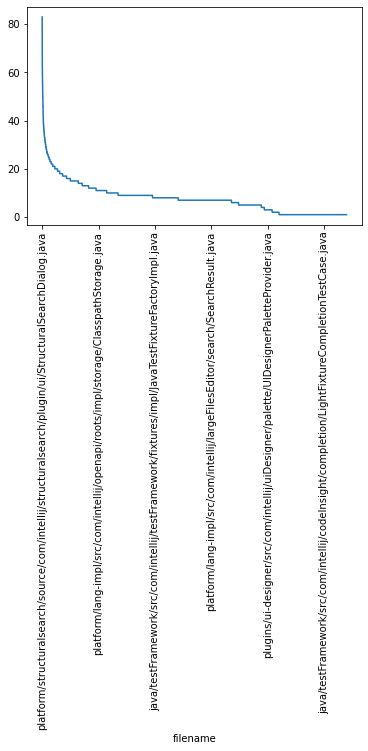

In [12]:
most_changes.plot(rot=90);

### End of Demo